About Dataset
Used Car Price Estimation Dataset
Overview
This dataset contains 10,000 realistic entries of used cars with various features such as mileage, engine size, number of previous owners, fuel type, and more. It is designed for regression tasks where the goal is to predict the resale price of a car in USD.

It’s perfect for:

Practicing regression models
Exploring feature importance
Building interactive dashboards
Training ML models for real-world pricing prediction


GETTING MODULES READY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


GETTING THE DATA SET UP

In [2]:
dataframe=pd.read_csv("used_car_price_dataset_extended.csv")
print(dataframe.shape)
print(f"DataFrame head of 3 samples")
print(dataframe.head(3))
print(f"Some description about the data")
print(dataframe.info())
print(dataframe.describe())

(10000, 12)
DataFrame head of 3 samples
   make_year  mileage_kmpl  engine_cc fuel_type  owner_count  price_usd  \
0       2001          8.17       4000    Petrol            4    8587.64   
1       2014         17.59       1500    Petrol            4    5943.50   
2       2023         18.09       2500    Diesel            5    9273.58   

       brand transmission  color service_history  accidents_reported  \
0  Chevrolet       Manual  White             NaN                   0   
1      Honda       Manual  Black             NaN                   0   
2        BMW    Automatic  Black            Full                   1   

  insurance_valid  
0              No  
1             Yes  
2             Yes  
Some description about the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1 

CHECKING FOR MISSING AND DUPLICATES AND HANDLING IT

In [3]:
print(dataframe.isna().sum()) #used for checking missing values
print(dataframe.duplicated().sum()) #used for checking the duplicated values

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64
0


In [4]:
print(f"In service history we have many missing values")
#checking it
print(dataframe["service_history"].unique())


In service history we have many missing values
[nan 'Full' 'Partial']


In [5]:
dataframe["service_history"].fillna("NOT_DONE",inplace=True)

C:\Users\yenug\AppData\Local\Temp\ipykernel_15720\2043173270.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe["service_history"].fillna("NOT_DONE",inplace=True)


In [6]:
dataframe["service_history"].isna().sum()
dataframe["service_history"].unique()

array(['NOT_DONE', 'Full', 'Partial'], dtype=object)

In [7]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     10000 non-null  object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB
None


In [8]:
print(dataframe.isnull().sum())

make_year             0
mileage_kmpl          0
engine_cc             0
fuel_type             0
owner_count           0
price_usd             0
brand                 0
transmission          0
color                 0
service_history       0
accidents_reported    0
insurance_valid       0
dtype: int64


In [9]:
print(dataframe.head(3))
list_of_objects=list(dataframe.select_dtypes(include=["object"]).columns)
list_of_numbers=list(dataframe.select_dtypes(include=["number"]).columns)

   make_year  mileage_kmpl  engine_cc fuel_type  owner_count  price_usd  \
0       2001          8.17       4000    Petrol            4    8587.64   
1       2014         17.59       1500    Petrol            4    5943.50   
2       2023         18.09       2500    Diesel            5    9273.58   

       brand transmission  color service_history  accidents_reported  \
0  Chevrolet       Manual  White        NOT_DONE                   0   
1      Honda       Manual  Black        NOT_DONE                   0   
2        BMW    Automatic  Black            Full                   1   

  insurance_valid  
0              No  
1             Yes  
2             Yes  


In [10]:
print(list_of_objects)
print(list_of_numbers)

['fuel_type', 'brand', 'transmission', 'color', 'service_history', 'insurance_valid']
['make_year', 'mileage_kmpl', 'engine_cc', 'owner_count', 'price_usd', 'accidents_reported']


In [11]:
from sklearn.preprocessing import LabelEncoder
dictionary_of_encoders={}
for i in list_of_objects:
        encoder=LabelEncoder()
        dataframe[i]=encoder.fit_transform(dataframe[i])
        dictionary_of_encoders[i]=encoder



In [12]:
for i,j in dictionary_of_encoders.items():
        print(i)
        print(j.classes_)

fuel_type
['Diesel' 'Electric' 'Petrol']
brand
['BMW' 'Chevrolet' 'Ford' 'Honda' 'Hyundai' 'Kia' 'Nissan' 'Tesla'
 'Toyota' 'Volkswagen']
transmission
['Automatic' 'Manual']
color
['Black' 'Blue' 'Gray' 'Red' 'Silver' 'White']
service_history
['Full' 'NOT_DONE' 'Partial']
insurance_valid
['No' 'Yes']


In [13]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  int32  
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  int32  
 7   transmission        10000 non-null  int32  
 8   color               10000 non-null  int32  
 9   service_history     10000 non-null  int32  
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  int32  
dtypes: float64(2), int32(6), int64(4)
memory usage: 703.3 KB
None


DATA VISUALISATION

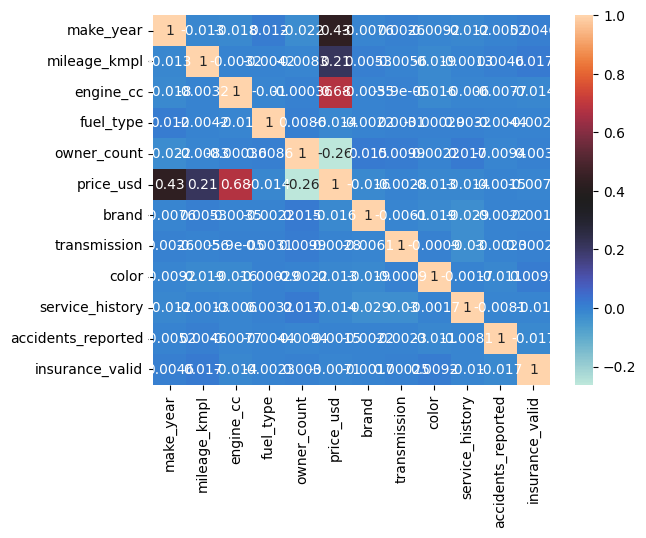

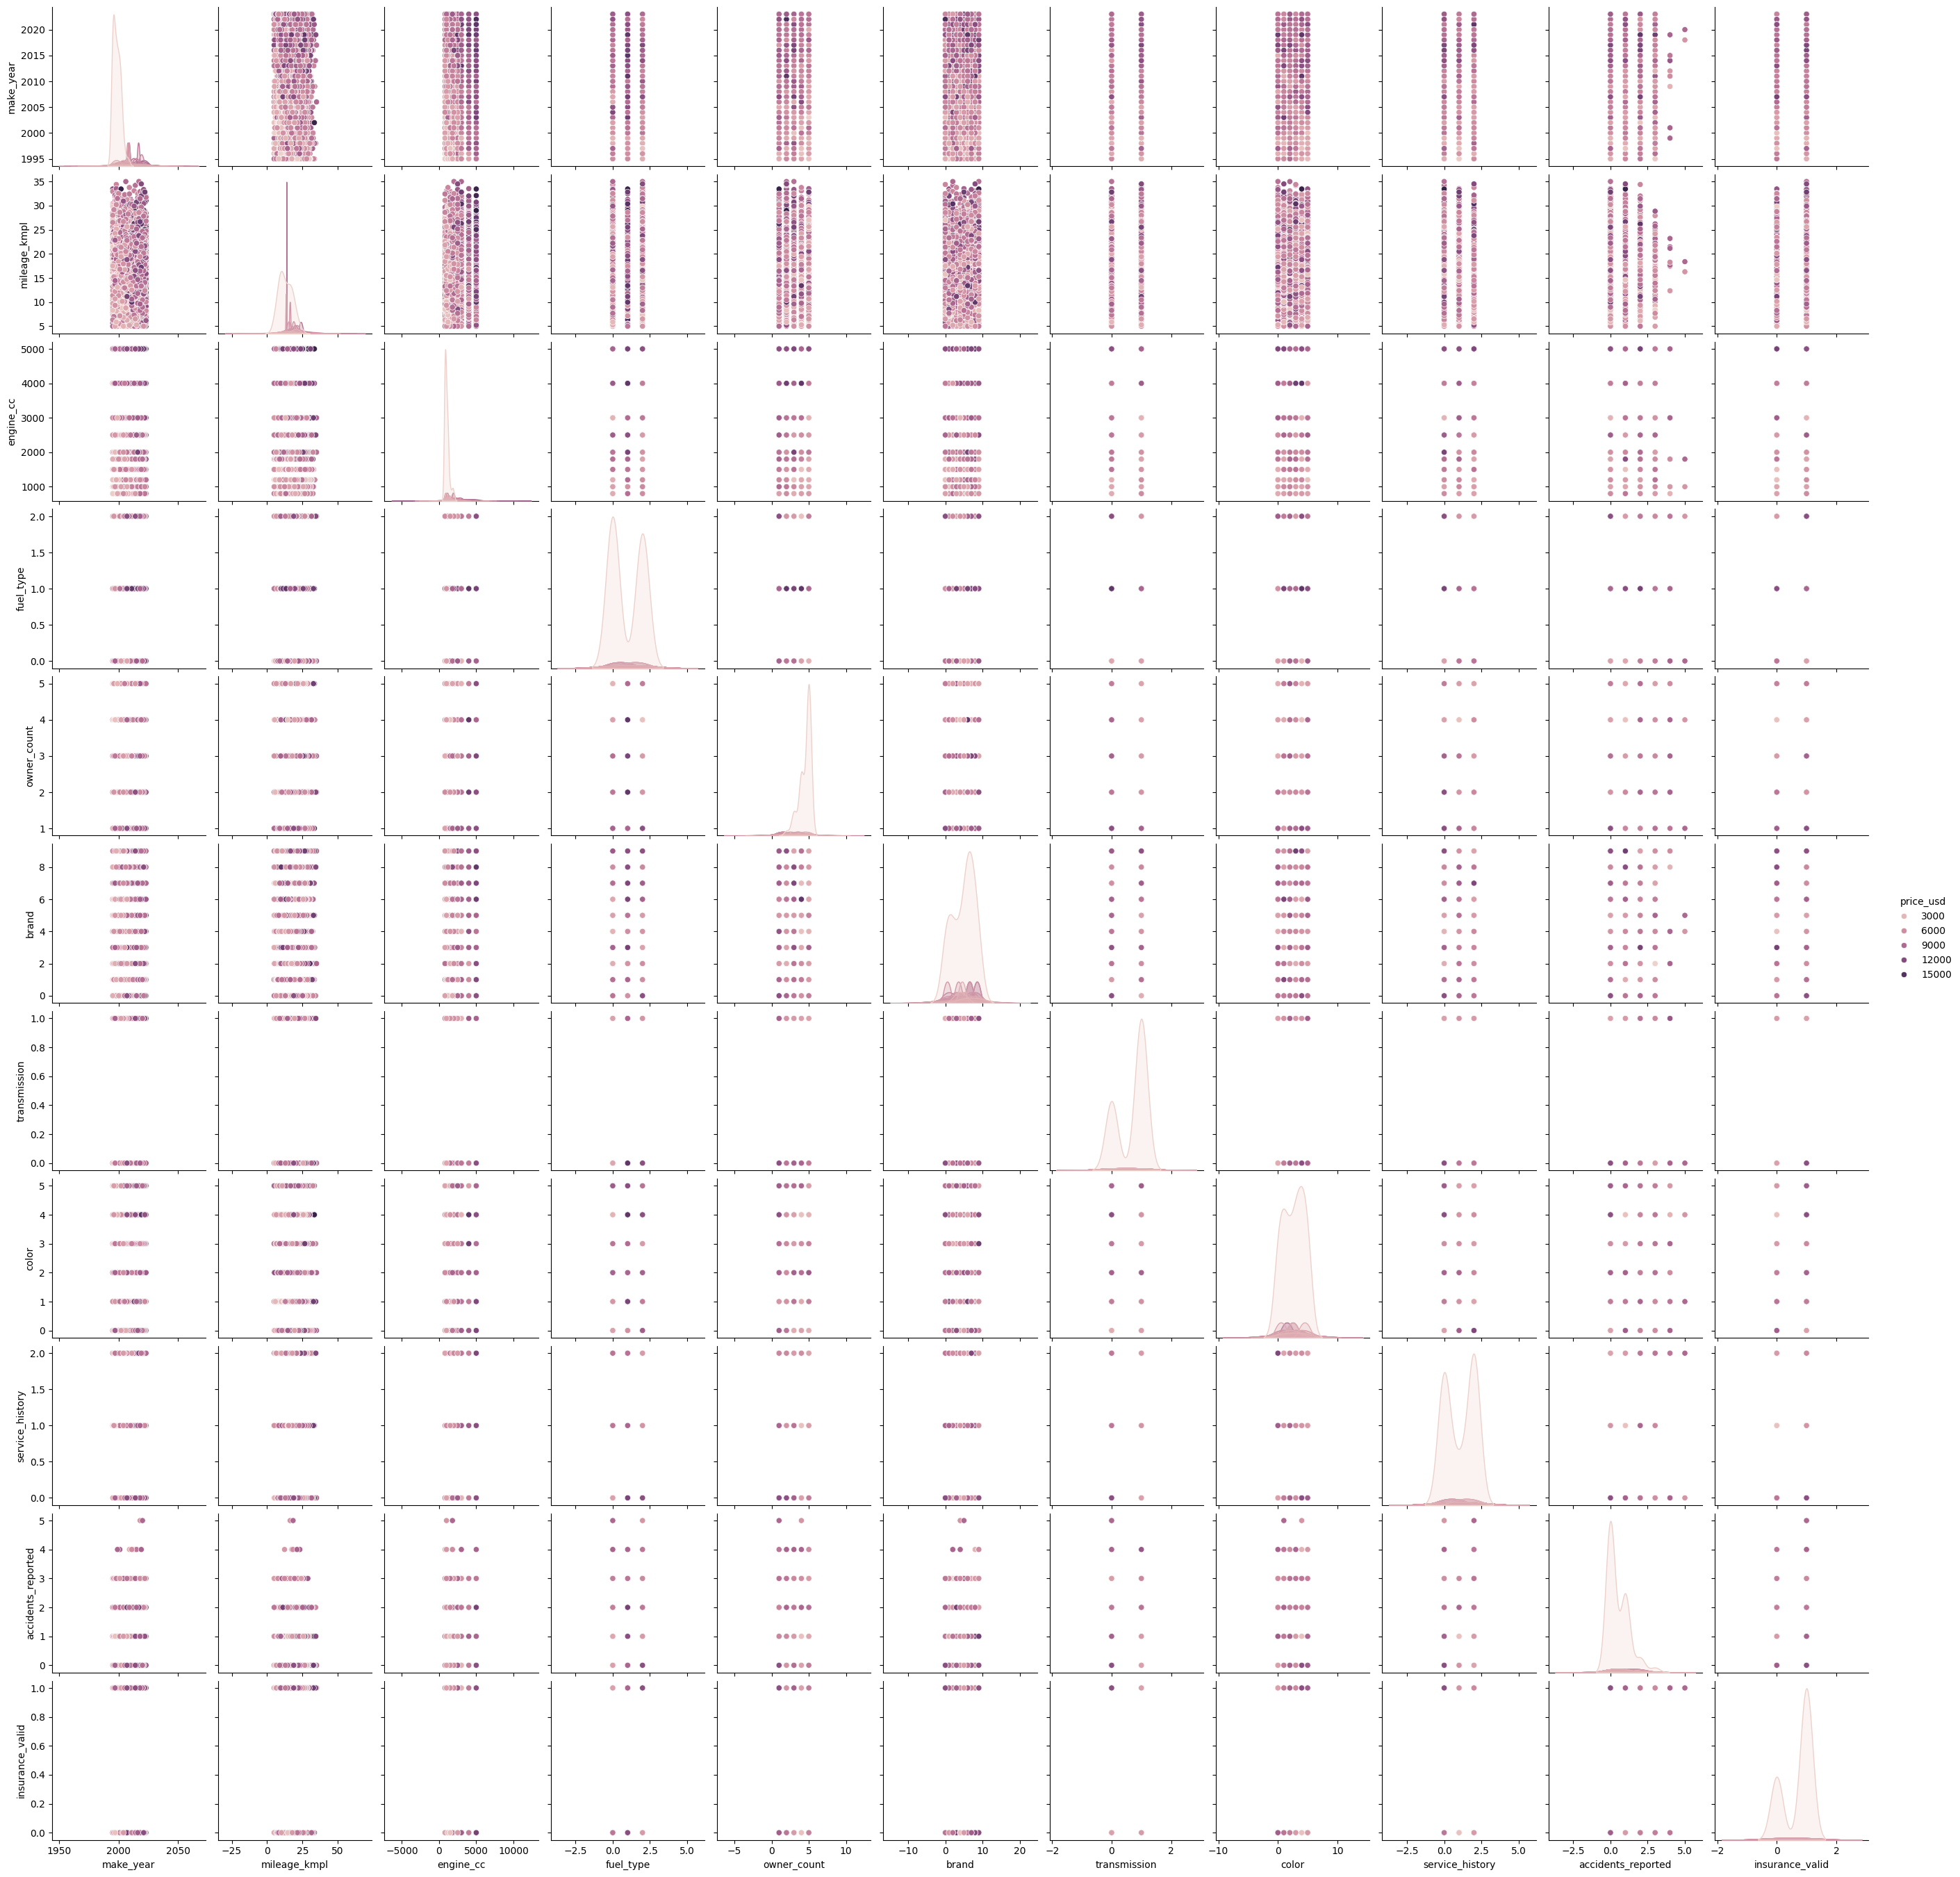

In [14]:
#EVERY DTYPE IS A NUMBER        
sns.heatmap(dataframe.corr(),annot=True,cmap="icefire")
sns.pairplot(dataframe,hue="price_usd")

train and test split


In [15]:
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV)
x=dataframe.drop(columns=["price_usd"])
y=dataframe["price_usd"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
list_of_splitters=[x_train,x_test,y_train,y_test]


In [16]:
for i in list_of_splitters:
        print(i.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


MODEL BUILDING

In [25]:
from sklearn.ensemble import (
        HistGradientBoostingRegressor,
        RandomForestRegressor,
)
from sklearn.linear_model import LinearRegression
models={
        "HGBR":{
                "model":HistGradientBoostingRegressor(),
                "params":{
                        'learning_rate':[0.01,0.1],
                        'max_iter':[100,300],
                        'max_depth':[5,10]

                }
        },
        "RFR":{
                
                "model":RandomForestRegressor(),
                "params":{
                        'n_estimators':[100,300],
                        "max_depth":[10,20,None],
                        "bootstrap":[True,False]
                        
                }

        },
        "LR":{
                "model":LinearRegression(),
                "params":{
                        "fit_intercept":[True,False]
                }

        }
}

In [26]:
best_models={}
for i,j in models.items():
        grid_searcher=GridSearchCV(j["model"],j['params'],cv=5,n_jobs=-1,scoring='neg_root_mean_squared_error')
        grid_searcher.fit(x_train,y_train)
        best_models[i]=grid_searcher.best_estimator_
        print(f"{i}:{grid_searcher.best_params_}")
        

HGBR:{'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 100}
RFR:{'bootstrap': True, 'max_depth': 20, 'n_estimators': 300}
LR:{'fit_intercept': True}


In [28]:
for i,j in best_models.items():
        r2_score=j.score(x_test,y_test)
        print(f"{i}:{r2_score}")

HGBR:0.8668627303361587
RFR:0.8160090196391472
LR:0.7817250797277978
